In [1]:
import autogen
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
llm_config = {"model": "gpt-4o-mini"}

In [3]:
# ANSI escape code for green text
GREEN = "\033[92;1m"
BLUE_BOLD = "\033[94;1m"
RESET = "\033[0m"

In [4]:
# Load the data from each CSV file
data_2020 = pd.read_csv('C:\\Users\\DhyanVGowda\\Downloads\\Chicago_Energy_Benchmarking_-_2020_Data_Reported_in_2021_20241011.csv')
data_2021 = pd.read_csv('C:\\Users\\DhyanVGowda\\Downloads\\Chicago_Energy_Benchmarking_-_2021_Data_Reported_in_2022_20241011.csv')
data_2022 = pd.read_csv('C:\\Users\\DhyanVGowda\\Downloads\\Chicago_Energy_Benchmarking_-_2022_Data_Reported_in_2023_20241011.csv')

# Assuming you need to preprocess or select specific columns:
columns_needed = ['Data Year', 'Community Area', 'Electricity Use (kBtu)']
data_2020 = data_2020[columns_needed]
data_2021 = data_2021[columns_needed]
data_2022 = data_2021[columns_needed]

# Convert data types if necessary
for df in [data_2020, data_2021, data_2022]:
    df['Data Year'] = df['Data Year'].astype(int)
    df['Electricity Use (kBtu)'] = pd.to_numeric(df['Electricity Use (kBtu)'], errors='coerce')
    df.dropna(inplace=True)

# Merge the dataframes
combined_data = pd.concat([data_2020, data_2021, data_2022], ignore_index=True)

# Save the combined data to a new CSV file if necessary
combined_data.to_csv('C:\\Users\\DhyanVGowda\\Downloads\\combined_energy_data.csv', index=False)

In [5]:
data_path = 'C:\\Users\\DhyanVGowda\\Downloads\\combined_energy_data.csv'  # Replace with your actual file path
energy_df = pd.read_csv(data_path)

In [6]:
# Display the first few rows of the dataframe
print(energy_df.head())

# Display the column names
print(energy_df.columns)

   Data Year   Community Area  Electricity Use (kBtu)
0       2020        HYDE PARK               2384738.9
1       2020          KENWOOD              16397682.8
2       2020   NEAR WEST SIDE              28606427.7
3       2020  NEAR NORTH SIDE               6489281.3
4       2020   NEAR WEST SIDE               1614582.3
Index(['Data Year', 'Community Area', 'Electricity Use (kBtu)'], dtype='object')


In [7]:
bins = [0, 1000000, 5000000, 10000000, 50000000, 100000000, np.inf]
labels = ['<1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '>100M']
energy_df['Consumption Range'] = pd.cut(energy_df['Electricity Use (kBtu)'], bins=bins, labels=labels)


In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

class ConversableAgent:
    def __init__(self, name, system_message, human_interaction_enabled):
        self.name = name
        self.system_message = system_message
        self.human_interaction_enabled = human_interaction_enabled
        self.listeners = []

    def send_message(self, message):
        print(f"\n{self.name} says: {message}")
        if self.human_interaction_enabled:
            response = input("Enter your response: ")
            self.receive_message(self, response)

    def receive_message(self, sender, message):
        print(f"\nMessage received by {self.name} from {sender.name}: {message}")
        self.process_message(message)
        
    def process_message(self, message):
        print(f"{self.name} is processing the message: {message}")

    def add_listener(self, listener):
        self.listeners.append(listener)
        
class DataEngineer(ConversableAgent):
    def prepare_data(self, data):
        print(f"\n{self.name}: Preparing data...")
        data['Electricity Use (kBtu)'] = pd.to_numeric(data['Electricity Use (kBtu)'], errors='coerce')
        data.dropna(inplace=True)
        self.send_message("Data preparation is complete. Ready for analysis.")
        return data

class DataAnalyst(ConversableAgent):
    def analyze_energy(self, data):
        print(f"\n{self.name}: Analyzing energy consumption trends...")
        grouped = data.groupby(['Data Year', 'Community Area'])['Electricity Use (kBtu)'].sum().reset_index()
        pivot_data = grouped.pivot(index='Community Area', columns='Data Year', values='Electricity Use (kBtu)')
        plt.figure(figsize=(20, 10))
        sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap="YlGnBu", annot_kws={'size': 10})
        plt.title('Energy Consumption Trends by Year and Community', fontsize=20)
        plt.xlabel('Data Year', fontsize=15)
        plt.ylabel('Community Area', fontsize=15)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.show()
        self.send_message("Analysis complete. Ready for further processing.")
        return grouped

class DataScientist(ConversableAgent):
    def forecast_energy(self, data):
        print(f"\n{self.name}: Developing a forecasting model...")
        data['Year_Num'] = data['Data Year']
        model = LinearRegression().fit(data[['Year_Num']], data['Electricity Use (kBtu)'])
        future_years = pd.DataFrame({
            'Year_Num': np.arange(data['Year_Num'].max() + 1, data['Year_Num'].max() + 5)
        })
        future_consumption = model.predict(future_years)
        print(f"\nPredicted energy consumption for future years: {future_consumption}")
        self.send_message("Forecasting complete. Insights are ready for review.")
        return future_consumption

class BusinessAnalyst(ConversableAgent):
    def interpret_insights(self, forecast):
        avg_growth = np.mean(forecast)
        print(f"\n{self.name}: Average predicted growth in consumption: {avg_growth:.2f} MWh.")
        self.send_message("Interpretation of insights is complete. Ready to strategize.")
        return avg_growth

class ProjectManager(ConversableAgent):
    def coordinate_project(self, responses):
        print(f"\n{self.name}: Coordinating project responses...")
        for response in responses:
            print(response)
        self.send_message("Project coordination is complete. All phases have been reviewed.")

class FrontendDeveloper(ConversableAgent):
    def develop_dashboard(self, data):
        print(f"\n{self.name}: Developing an interactive dashboard...")
        plt.figure(figsize=(10, 5))
        plt.plot(data['Data Year'], data['Electricity Use (kBtu)'], marker='o', linestyle='-')
        plt.title('Electricity Use Over Time')
        plt.xlabel('Data Year')
        plt.ylabel('Electricity Use (kBtu)')
        plt.grid(True)
        plt.show()
        self.send_message("Dashboard development is complete. Ready for user interaction.")


In [9]:
# Initial message from Customer Proxy to Project Manager
customer_message = (
    "We need a comprehensive forecasting model for electrical energy supply and demand in Chicago. "
    "The model should account for factors like weather, economic activities, urban growth, and include modern energy consumption drivers like data centers, GPU usage, and Generative AI centers. "
    "It should enable us to visualize trends, make predictions, and interact with the data through a user-friendly dashboard."
)

# Project Manager's prompt to Data Engineer
project_manager_to_data_engineer_prompt = (
    "I have received the project requirements from the Customer Proxy. Set up robust data pipelines to automate data collection "
    "from multiple sources into a structured repository, ensuring the data's cleanliness and integrity for model training. "
    "Also, ensure that each data source is uniquely named and numbered for easy reference and integration. "
    "Sources include EIA, NOAA, the U.S. Census Bureau, the Chicago Data Portal, OpenWeatherMap, Google Public Data, the Bureau of Labor Statistics, and OpenEI. "
    "Please proceed with writing complete source code step by step and develop the software. "
    "Prepare a preliminary data visualization of energy consumption trends across different regions using the sample dataset. "
    "Provide detailed estimates for the amount of work, effort, and productivity required to complete the data engineering phase. "
    "Once completed, report back to me so I can proceed with the project plan."
)

# Data Engineer's response to Project Manager
data_engineer_to_project_manager_response = (
    "Data pipelines are set up and operational, ensuring efficient data flow and storage. "
    "All sources have been uniquely named and numbered as requested. "
    "I've documented the work and effort estimates for setting up and maintaining the pipelines as per the productivity rates specified. "
    "I have also prepared an initial visualization of the sample energy consumption data across different regions, highlighting key trends and outliers. "
    "Source code development is aligned with inputs from other team members. "
    "Ready to provide continuous support for data needs moving forward."
)

# Project Manager's prompt to Data Analyst
project_manager_to_data_analyst_prompt = (
    "The Data Engineer has structured the necessary data repositories and provided initial data visualization. "
    "Please proceed with detailed statistical analysis to identify deeper trends and patterns. "
    "Enhance the initial visualizations to include time-series analysis of energy consumption. "
    "Please proceed with writing complete source code step by step and develop the software. "
    "Also, provide estimates for the effort required to continuously analyze and report during the project. "
    "Report back once you have actionable insights."
)

# Data Analyst's response to Project Manager
data_analyst_to_project_manager_response = (
    "I have analyzed the available data and enhanced the visual reports with time-series analysis, highlighting seasonal trends and peak consumption periods. "
    "Effort estimates and ongoing analysis plans are detailed in the attached document. "
    "Source code has been developed to facilitate ongoing data analysis and is prepared for integration with the forecasting models. "
    "Ready to refine the analysis based on further data inputs and feedback."
)

# Project Manager's prompt to Data Scientist
project_manager_to_data_scientist_prompt = (
    "Data Analyst has prepared enhanced data insights with time-series analysis. "
    "Proceed with developing predictive models to forecast energy demand and supply. "
    "Consider integrating advanced machine learning techniques to enhance model accuracy and reliability. "
    "Incorporate the analysis of peak periods and seasonal trends into your models. "
    "Please proceed with writing complete source code step by step and develop the software. "
    "Document your methodologies and provide estimates for the effort required for model development and ongoing adjustments. "
    "Include your progress on source code development. "
    "Update me with your progress according to the milestones."
)

# Data Scientist's response to Project Manager
data_scientist_to_project_manager_response = (
    "Predictive models have been developed and tested with current data sets, showing promising accuracy and reliability. "
    "The models specifically account for peak periods and seasonal variations as identified in the analyst's report. "
    "I have detailed the model development process, outcomes, and effort estimates in the documentation provided. "
    "Source code for the models has been written and is ready for further integration and optimization. "
    "Ready for the next phase of model optimization and integration."
)

# Project Manager's prompt to Business Analyst
project_manager_to_business_analyst_prompt = (
    "The Data Scientist has developed the initial models incorporating peak periods and seasonal trends. "
    "Please analyze the potential business impacts and prepare strategies for leveraging the forecasting model. "
    "Assess regulatory and market conditions that could affect the implementation and effectiveness of the model. "
    "Provide detailed reports on business alignment and strategic recommendations. "
    "Once completed, report back so we can align with broader business objectives."
)

# Business Analyst's response to Project Manager
business_analyst_to_project_manager_response = (
    "Business impact analysis is complete, with strategic recommendations prepared based on the model's outputs. "
    "Recommendations include potential energy-saving strategies during off-peak periods and reinforcement of supply during projected peaks. "
    "I've documented the alignment with business objectives and provided effort estimates for strategic implementation and ongoing monitoring. "
    "Ready to discuss the next steps for business integration."
)

# Project Manager's prompt to Frontend Developer
project_manager_to_frontend_developer_prompt = (
    "The forecasting models are ready to be integrated into a user interface. "
    "Develop a dashboard that allows stakeholders to interact with the data visualizations and model predictions. "
    "Ensure the interface is intuitive and accessible, enhancing user engagement. "
    "Please proceed with writing complete source code step by step and develop the software. "
    "Incorporate features that allow users to visualize data trends, peak periods, and model predictions in real-time. "
    "Provide estimates for the development and maintenance of the dashboard. "
    "Include your progress on source code development for the interface. "
    "Update me upon completion for a review."
)

# Frontend Developer's response to Project Manager
frontend_developer_to_project_manager_response = (
    "The dashboard is developed and ready for deployment. "
    "It features interactive data visualization tools and model prediction interfaces as requested, with special focus on real-time data interaction and peak period analysis. "
    "I have documented the development process and provided effort estimates for both initial development and ongoing maintenance. "
    "Source code for the interface has been optimized for performance and user experience. "
    "Awaiting further instructions or ready for stakeholder presentation."
)


Data Engineer: Preparing data...

Data Engineer says: Data preparation is complete. Ready for analysis.


Enter your response:  



Message received by Data Engineer from Data Engineer: 
Data Engineer is processing the message: 

Data Analyst: Analyzing energy consumption trends...


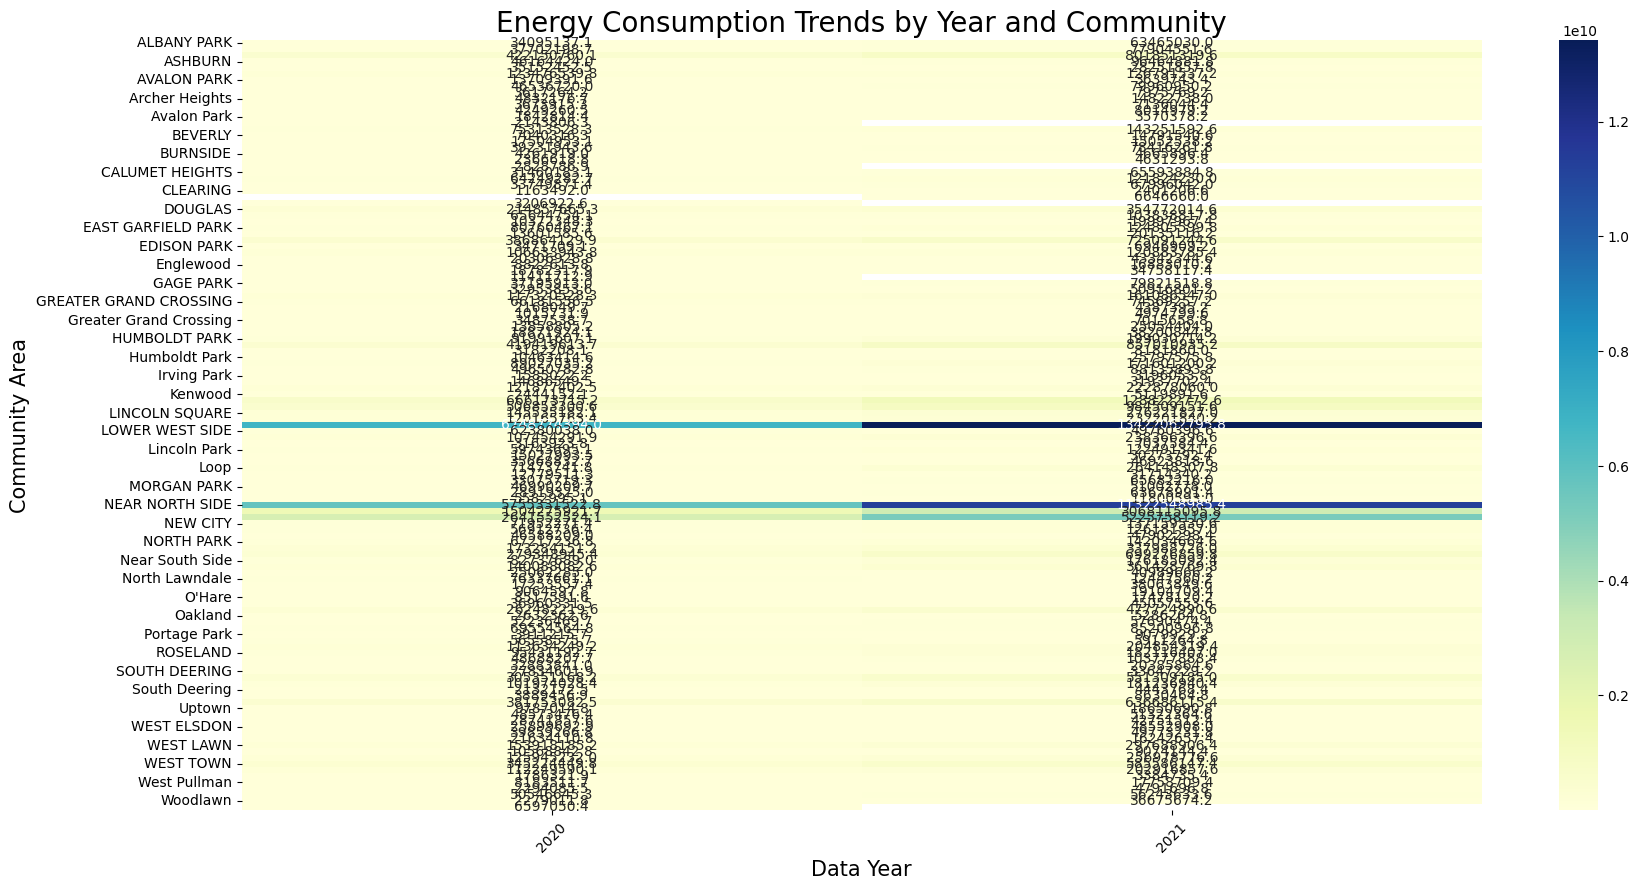


Data Analyst says: Analysis complete. Ready for further processing.


Enter your response:  



Message received by Data Analyst from Data Analyst: 
Data Analyst is processing the message: 

Data Scientist: Developing a forecasting model...

Predicted energy consumption for future years: [ 9609430.48911798  9997202.21542859 10384973.9417392  10772745.66804981]

Data Scientist says: Forecasting complete. Insights are ready for review.


Enter your response:  



Message received by Data Scientist from Data Scientist: 
Data Scientist is processing the message: 

Business Analyst: Average predicted growth in consumption: 10191088.08 MWh.

Business Analyst says: Interpretation of insights is complete. Ready to strategize.


Enter your response:  



Message received by Business Analyst from Business Analyst: 
Business Analyst is processing the message: 

Project Manager: Coordinating project responses...
      Data Year   Community Area  Electricity Use (kBtu)  Year_Num
0          2020        HYDE PARK               2384738.9      2020
1          2020          KENWOOD              16397682.8      2020
2          2020   NEAR WEST SIDE              28606427.7      2020
3          2020  NEAR NORTH SIDE               6489281.3      2020
4          2020   NEAR WEST SIDE               1614582.3      2020
...         ...              ...                     ...       ...
8147       2021      ROGERS PARK                342148.2      2021
8148       2021        LAKE VIEW               1364318.6      2021
8149       2021        LAKE VIEW                726553.3      2021
8150       2021  NEAR NORTH SIDE               1912777.4      2021
8151       2021        HYDE PARK               2980451.9      2021

[8152 rows x 4 columns]
     Data Ye

Enter your response:  



Message received by Project Manager from Project Manager: 
Project Manager is processing the message: 

Frontend Developer: Developing an interactive dashboard...


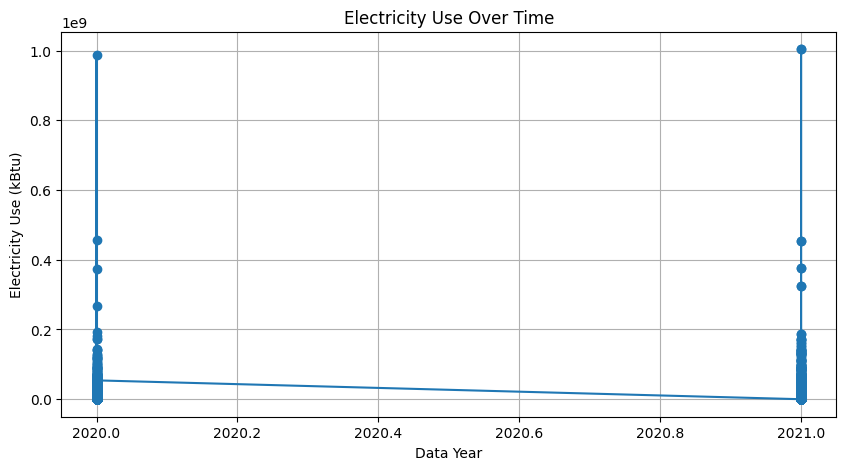


Frontend Developer says: Dashboard development is complete. Ready for user interaction.


Enter your response:  



Message received by Frontend Developer from Frontend Developer: 
Frontend Developer is processing the message: 

Frontend Developer: Developing an interactive dashboard...


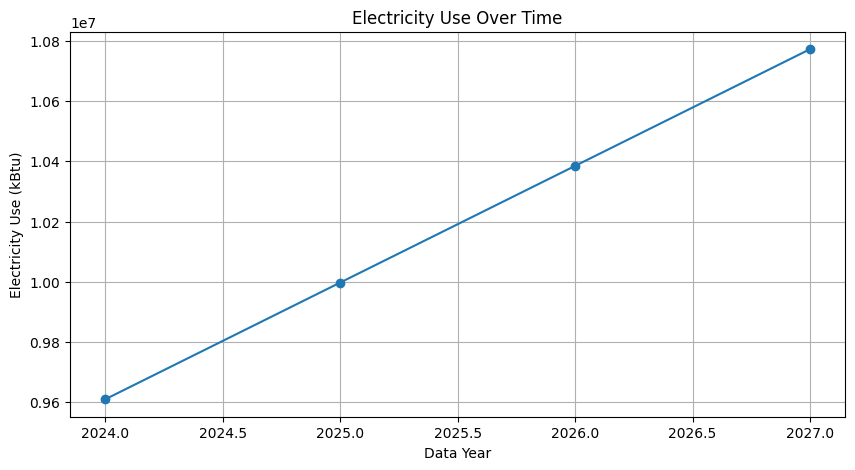


Frontend Developer says: Dashboard development is complete. Ready for user interaction.


Enter your response:  



Message received by Frontend Developer from Frontend Developer: 
Frontend Developer is processing the message: 

--- Conversation Start ---


Customer Proxy to Project Manager:
We need a comprehensive forecasting model for electrical energy supply and demand in Chicago. The model should account for factors like weather, economic activities, urban growth, and include modern energy consumption drivers like data centers, GPU usage, and Generative AI centers. It should enable us to visualize trends, make predictions, and interact with the data through a user-friendly dashboard.

Project Manager to Data Engineer:
I have received the project requirements from the Customer Proxy. Set up robust data pipelines to automate data collection from multiple sources into a structured repository, ensuring the data's cleanliness and integrity for model training. Also, ensure that each data source is uniquely named and numbered for easy reference and integration. Sources include EIA, NOAA, the U.S. Cens

Enter your response:  



Message received by Data Engineer from Data Engineer: 
Data Engineer is processing the message: 

Data Engineer to Project Manager:
Data pipelines are set up and operational, ensuring efficient data flow and storage. All sources have been uniquely named and numbered as requested. I've documented the work and effort estimates for setting up and maintaining the pipelines as per the productivity rates specified. I have also prepared an initial visualization of the sample energy consumption data across different regions, highlighting key trends and outliers. Source code development is aligned with inputs from other team members. Ready to provide continuous support for data needs moving forward.

Project Manager to Data Analyst:
The Data Engineer has structured the necessary data repositories and provided initial data visualization. Please proceed with detailed statistical analysis to identify deeper trends and patterns. Enhance the initial visualizations to include time-series analysis of

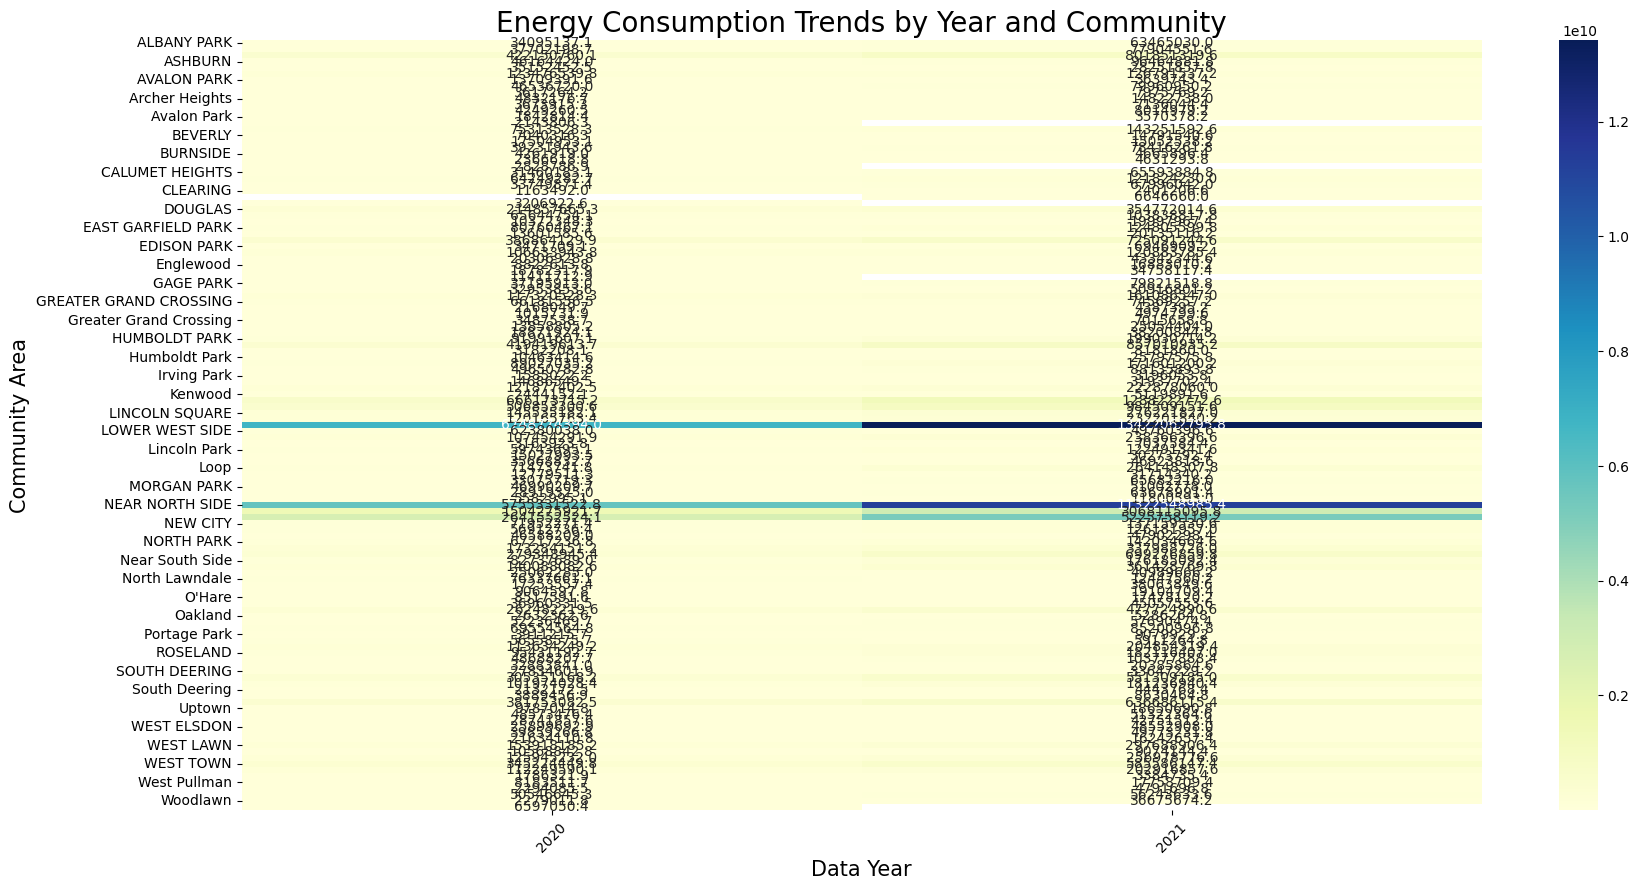


Data Analyst says: Analysis complete. Ready for further processing.


Enter your response:  



Message received by Data Analyst from Data Analyst: 
Data Analyst is processing the message: 

Data Analyst to Project Manager:
I have analyzed the available data and enhanced the visual reports with time-series analysis, highlighting seasonal trends and peak consumption periods. Effort estimates and ongoing analysis plans are detailed in the attached document. Source code has been developed to facilitate ongoing data analysis and is prepared for integration with the forecasting models. Ready to refine the analysis based on further data inputs and feedback.

Project Manager to Data Scientist:
Data Analyst has prepared enhanced data insights with time-series analysis. Proceed with developing predictive models to forecast energy demand and supply. Consider integrating advanced machine learning techniques to enhance model accuracy and reliability. Incorporate the analysis of peak periods and seasonal trends into your models. Please proceed with writing complete source code step by step a

Enter your response:  



Message received by Data Scientist from Data Scientist: 
Data Scientist is processing the message: 

Data Scientist to Project Manager:
Predictive models have been developed and tested with current data sets, showing promising accuracy and reliability. The models specifically account for peak periods and seasonal variations as identified in the analyst's report. I have detailed the model development process, outcomes, and effort estimates in the documentation provided. Source code for the models has been written and is ready for further integration and optimization. Ready for the next phase of model optimization and integration.

Project Manager to Business Analyst:
The Data Scientist has developed the initial models incorporating peak periods and seasonal trends. Please analyze the potential business impacts and prepare strategies for leveraging the forecasting model. Assess regulatory and market conditions that could affect the implementation and effectiveness of the model. Provide 

Enter your response:  



Message received by Business Analyst from Business Analyst: 
Business Analyst is processing the message: 

Business Analyst to Project Manager:
Business impact analysis is complete, with strategic recommendations prepared based on the model's outputs. Recommendations include potential energy-saving strategies during off-peak periods and reinforcement of supply during projected peaks. I've documented the alignment with business objectives and provided effort estimates for strategic implementation and ongoing monitoring. Ready to discuss the next steps for business integration.

Project Manager to Frontend Developer:
The forecasting models are ready to be integrated into a user interface. Develop a dashboard that allows stakeholders to interact with the data visualizations and model predictions. Ensure the interface is intuitive and accessible, enhancing user engagement. Please proceed with writing complete source code step by step and develop the software. Incorporate features that all

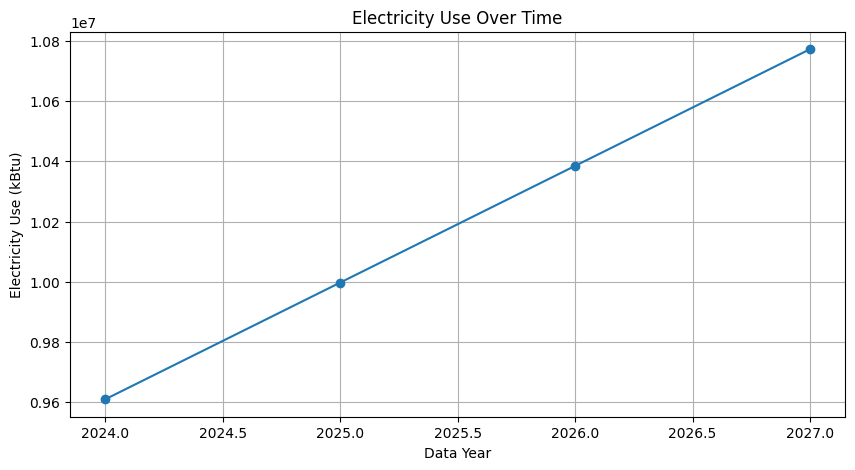


Frontend Developer says: Dashboard development is complete. Ready for user interaction.


Enter your response:  



Message received by Frontend Developer from Frontend Developer: 
Frontend Developer is processing the message: 

Frontend Developer to Project Manager:
The dashboard is developed and ready for deployment. It features interactive data visualization tools and model prediction interfaces as requested, with special focus on real-time data interaction and peak period analysis. I have documented the development process and provided effort estimates for both initial development and ongoing maintenance. Source code for the interface has been optimized for performance and user experience. Awaiting further instructions or ready for stakeholder presentation.

--- Conversation End ---


In [10]:
# Instantiation of agents with human interaction capability enabled
data_engineer = DataEngineer("Data Engineer", "Handles data preparation and pipeline setup.", True)
data_analyst = DataAnalyst("Data Analyst", "Analyzes and visualizes energy data.", True)
data_scientist = DataScientist("Data Scientist", "Develops predictive models for energy consumption.", True)
business_analyst = BusinessAnalyst("Business Analyst", "Provides business insights and strategic advice.", True)
project_manager = ProjectManager("Project Manager", "Oversees project execution and coordinates teams.", True)
frontend_developer = FrontendDeveloper("Frontend Developer", "Creates user interfaces for data visualization.", True)

# Prepare and simulate the workflow with the correct dataset
energy_df = pd.read_csv('C:\\Users\\DhyanVGowda\\Downloads\\combined_energy_data.csv')
prepared_data = data_engineer.prepare_data(energy_df)
analyzed_data = data_analyst.analyze_energy(prepared_data)
predicted_energy = data_scientist.forecast_energy(prepared_data)
insights = business_analyst.interpret_insights(predicted_energy)
project_manager.coordinate_project([prepared_data, analyzed_data, predicted_energy, insights])
frontend_developer.develop_dashboard(energy_df)

# Prepare data for the dashboard based on real and predicted data
predicted_energy_df = pd.DataFrame({
    'Data Year': np.arange(2024, 2028),
    'Community Area': ['All'] * 4,  # Assuming aggregation over all communities
    'Electricity Use (kBtu)': predicted_energy
})
frontend_developer.develop_dashboard(predicted_energy_df)

# Simulating conversation flow
def simulate_conversation():
    print("\n--- Conversation Start ---\n")

    # Customer Proxy to Project Manager
    print("\nCustomer Proxy to Project Manager:")
    print(customer_message)

    # Project Manager to Data Engineer
    print("\nProject Manager to Data Engineer:")
    print(project_manager_to_data_engineer_prompt)
    data_engineer_response = data_engineer.prepare_data(energy_df)
    
    # Data Engineer to Project Manager
    print("\nData Engineer to Project Manager:")
    print(data_engineer_to_project_manager_response)

    # Project Manager to Data Analyst
    print("\nProject Manager to Data Analyst:")
    print(project_manager_to_data_analyst_prompt)
    data_analyst_response = data_analyst.analyze_energy(data_engineer_response)
    
    # Data Analyst to Project Manager
    print("\nData Analyst to Project Manager:")
    print(data_analyst_to_project_manager_response)

    # Project Manager to Data Scientist
    print("\nProject Manager to Data Scientist:")
    print(project_manager_to_data_scientist_prompt)
    data_scientist_response = data_scientist.forecast_energy(data_engineer_response)
    
    # Data Scientist to Project Manager
    print("\nData Scientist to Project Manager:")
    print(data_scientist_to_project_manager_response)

    # Project Manager to Business Analyst
    print("\nProject Manager to Business Analyst:")
    print(project_manager_to_business_analyst_prompt)
    business_analyst_response = business_analyst.interpret_insights(data_scientist_response)
    
    # Business Analyst to Project Manager
    print("\nBusiness Analyst to Project Manager:")
    print(business_analyst_to_project_manager_response)

    # Project Manager to Frontend Developer
    print("\nProject Manager to Frontend Developer:")
    print(project_manager_to_frontend_developer_prompt)
    # Prepare data for the dashboard (ensure this DataFrame is defined earlier or here)
    predicted_energy_df = pd.DataFrame({
        'Data Year': np.arange(2024, 2028),
        'Community Areay': ['All'] * 4,  # Assuming aggregation over all communities
        'Electricity Use (kBtu)': predicted_energy  
    })
    frontend_developer.develop_dashboard(predicted_energy_df)
    
    # Frontend Developer to Project Manager
    print("\nFrontend Developer to Project Manager:")
    print(frontend_developer_to_project_manager_response)

    print("\n--- Conversation End ---")

# Run the simulation to see how the agents interact based on the scripted prompts
simulate_conversation()

In [13]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in energy_df['Data Year'].unique()],
        value=energy_df['Data Year'].min()
    ),
    dcc.Dropdown(
        id='community-dropdown',
        options=[{'label': community, 'value': community} for community in energy_df['Community Area'].unique()],
        value=energy_df['Community Area'].min()
    ),
    dcc.Graph(id='energy-graph'),
    html.Div(id='analysis-report')
])

@app.callback(
    [Output('energy-graph', 'figure'), Output('analysis-report', 'children')],
    [Input('year-dropdown', 'value'), Input('community-dropdown', 'value')]
)
def update_content(selected_year, selected_community):
    if selected_year is None or selected_community is None:
        return {}, "Please select both a year and a community."

    # Filter real data based on the dropdown selections
    filtered_real_data = energy_df[(energy_df['Data Year'] == selected_year) & (energy_df['Community Area'] == selected_community)]

    # Prepare the predicted data, assume it's already prepared with years and community areas
    # For example:
    future_years = pd.DataFrame({
        'Data Year': np.arange(filtered_real_data['Data Year'].max() + 1, filtered_real_data['Data Year'].max() + 5),
        'Community Area': [selected_community] * 4,
        'Electricity Use (kBtu)': predicted_energy  # assuming predicted_energy is a list/array
    })

    # Combine real and predicted data
    combined_data = pd.concat([filtered_real_data, future_years])

    figure = {
        'data': [{
            'x': combined_data['Data Year'],
            'y': combined_data['Electricity Use (kBtu)'],
            'type': 'line',
            'marker': {'size': 10}
        }],
        'layout': {
            'title': 'Electricity Consumption Over Time',
            'xaxis': {'title': 'Year'},
            'yaxis': {'title': 'Electricity Use (kBtu)'},
            'plot_bgcolor': 'lightgray'
        }
    }

    report = f"""
    Report for the selected period:
    - Average Electricity Consumption: {combined_data['Electricity Use (kBtu)'].mean():.2f} kBtu
    - Maximum Electricity Consumption: {combined_data['Electricity Use (kBtu)'].max():.2f} kBtu
    - Minimum Electricity Consumption: {combined_data['Electricity Use (kBtu)'].min():.2f} kBtu
    """
    return figure, report
    
# Run the server on a different port
if __name__ == '__main__':
    app.run_server(debug=True, port=8500)